In [1]:
__file__ = 'A1.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP4_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat
import scipy.constants as const
import lmfit

In [2]:
with open('Data/cp-cal_data.txt','r') as tf:
    data = np.genfromtxt(tf).T
for i in range(len(data[1])):
    data[0][i]-= 729900

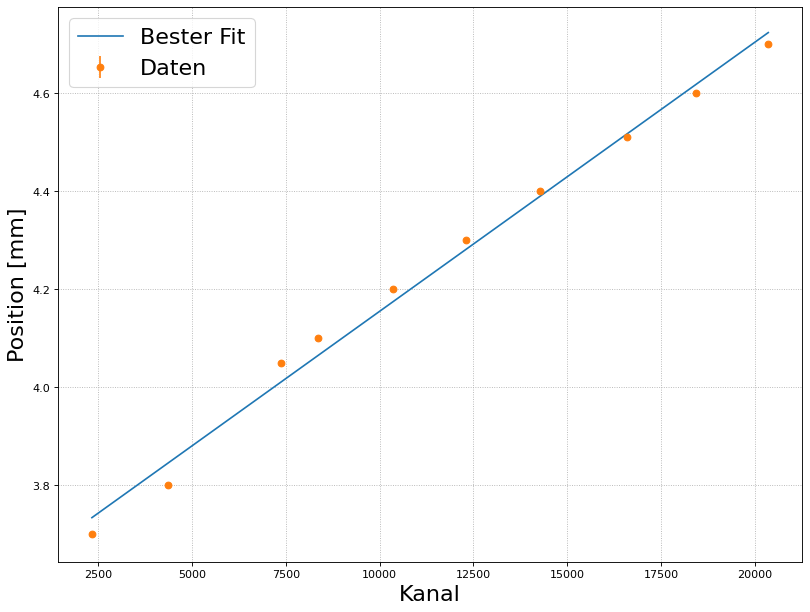

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 10
    # variables        = 2
    chi-square         = 321.918759
    reduced chi-square = 40.2398449
    Akaike info crit   = 38.7171412
    Bayesian info crit = 39.3223114
    R-squared          = -325.608862
[[Variables]]
    slope:      5.4965e-05 +/- 1.7632e-06 (3.21%) (init = 5.496524e-05)
    intercept:  3.60531238 +/- 0.02258149 (0.63%) (init = 3.605312)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.896


In [5]:
f.figsize(1)

res = f.linfit(data[1],data[0],np.full(len(data[1]),0.005))
plt.plot(data[0],res.eval(x=data[0]),label='Bester Fit')
plt.errorbar(data[0],data[1],np.full(len(data[1]),0.005),fmt='o',label='Daten')
f.form(xlabel='Kanal',ylabel='Position [mm]',name='Res/A5_cpcal.pdf')
print(res.fit_report())

In [4]:
with open('Res/cp-cal_res.txt','w')as tf:
    tf.write(str(res.params['slope'].value)+'\t'+str(res.params['slope'].stderr)+'\t'+str(res.params['intercept'].value)+'\t'+str(res.params['intercept'].stderr))